In [1]:
%load_ext autoreload
%autoreload 2

import pickle
from tqdm import tqdm
import pandas as pd
import numpy as np
from glob import glob

from computage.utils.data_utils import get_bsb_config
from computage import EpiClocksBenchmarking

import warnings
warnings.filterwarnings('ignore')

# Benchmarking of published clocks

In [2]:
#let's first get the BSB config file for datasets
datasets_config_main = get_bsb_config()

#look at it
list(datasets_config_main.items())[:4]
#note currently config contains empty paths to GSEs.
#You can fill them manually if you already downloaded the dataset
#in a specific directory. Otherwise, script fills them automatically
#after the dataset downloading.

[('GSE56046', {'path': None, 'conditions': ['AS'], 'test': 'AA2'}),
 ('GSE56581', {'path': None, 'conditions': ['AS'], 'test': 'AA2'}),
 ('GSE62867', {'path': None, 'conditions': ['IHD'], 'test': 'AA1'}),
 ('GSE69138', {'path': None, 'conditions': ['CVA'], 'test': 'AA1'})]

In [3]:
#define imputation method, we recommend sesame_450k gold standard
#average methylation values. This is in principle the same as imputation
#with averages but we consider it more stable and recommend to usage.
#Other possible imputation methods are: 
#  with zeros: 'none'
#  averages: 'average'

common_imputation = 'sesame_450k'
models_config = {
    "in_library":{
        'HorvathV1':{'imputation':common_imputation},
        'Hannum':{'imputation':common_imputation},
        'Lin':{'imputation':common_imputation},
        'PhenoAgeV1':{'imputation':common_imputation},
        'YingCausAge':{'imputation':common_imputation},
        'YingDamAge':{'imputation':common_imputation},
        'YingAdaptAge':{'imputation':common_imputation},
        'HorvathV2':{'imputation':common_imputation},
        'PhenoAgeV2':{'imputation':common_imputation},
		'VidalBralo':{'imputation':common_imputation},
		'Zhang19_EN':{'imputation':common_imputation},
        'GrimAgeV1':{'imputation':common_imputation},
        'GrimAgeV2':{'imputation':common_imputation},
    },
    "new_models":{
        # pass it as empty, since we didn't propose 
        # new models in our study
    }
}

13 models will be tested on 66 datasets.
Run benchmarking!
Check data.


Fetching 69 files:   0%|          | 0/69 [00:00<?, ?it/s]

Datasets:   2%|▏         | 1/66 [00:05<06:21,  5.87s/it]

GSE56046:AS - AA2 testing 789 disease versus 339 healthy samples


Datasets:   3%|▎         | 2/66 [00:08<04:11,  3.93s/it]

GSE56581:AS - AA2 testing 133 disease versus 66 healthy samples


Datasets:   5%|▍         | 3/66 [00:10<03:09,  3.01s/it]

GSE62867:IHD - AA1 testing 6 disease samples


Datasets:   6%|▌         | 4/66 [00:12<02:51,  2.77s/it]

GSE69138:CVA - AA1 testing 172 disease samples


Datasets:   8%|▊         | 5/66 [00:14<02:34,  2.52s/it]

GSE107143:AS - AA2 testing 8 disease versus 8 healthy samples


Datasets:   9%|▉         | 6/66 [00:17<02:26,  2.44s/it]

GSE203399:CVA - AA1 testing 118 disease samples


Datasets:  11%|█         | 7/66 [00:19<02:19,  2.36s/it]

GSE32148:IBD - AA2 testing 5 disease versus 5 healthy samples


Datasets:  12%|█▏        | 8/66 [00:21<02:19,  2.41s/it]

GSE53840:HIV - AA1 testing 111 disease samples


Datasets:  14%|█▎        | 9/66 [00:23<02:10,  2.29s/it]

GSE53841:HIV - AA1 testing 24 disease samples


Datasets:  15%|█▌        | 10/66 [00:26<02:19,  2.50s/it]

GSE67705:HIV - AA2 testing 189 disease versus 91 healthy samples


Datasets:  17%|█▋        | 11/66 [00:28<02:11,  2.40s/it]

GSE67751:HIV - AA2 testing 23 disease versus 69 healthy samples


Datasets:  18%|█▊        | 12/66 [00:32<02:22,  2.65s/it]

GSE77696:HIV - AA2 testing 261 disease versus 117 healthy samples


Datasets:  20%|█▉        | 13/66 [00:34<02:11,  2.47s/it]

GSE81961:IBD - AA2 testing 15 disease versus 25 healthy samples


Datasets:  21%|██        | 14/66 [00:37<02:17,  2.64s/it]

GSE87640:IBD - AA2 testing 156 disease versus 84 healthy samples


Datasets:  23%|██▎       | 15/66 [00:43<03:13,  3.79s/it]

GSE87648:IBD - AA2 testing 203 disease versus 176 healthy samples


Datasets:  24%|██▍       | 16/66 [00:47<03:06,  3.73s/it]

GSE100264:HIV - AA1 testing 386 disease samples


Datasets:  26%|██▌       | 17/66 [00:51<03:06,  3.81s/it]

GSE107080:HIV - AA1 testing 405 disease samples


Datasets:  27%|██▋       | 18/66 [00:55<03:06,  3.90s/it]

GSE117859:HIV - AA1 testing 608 disease samples


Datasets:  29%|██▉       | 19/66 [00:59<03:11,  4.06s/it]

GSE117860:HIV - AA1 testing 529 disease samples


Datasets:  30%|███       | 20/66 [01:02<02:42,  3.53s/it]

GSE140800:HIV - AA1 testing 70 disease samples


Datasets:  32%|███▏      | 21/66 [01:04<02:20,  3.12s/it]

GSE143942:HIV - AA2 testing 42 disease versus 12 healthy samples


Datasets:  33%|███▎      | 22/66 [01:06<02:06,  2.89s/it]

GSE145714:HIV_TB - AA2 testing 6 disease versus 9 healthy samples
GSE145714:TB - AA2 testing 12 disease versus 9 healthy samples


Datasets:  35%|███▍      | 23/66 [01:08<01:54,  2.67s/it]

GSE185389:HIV - AA1 testing 56 disease samples


Datasets:  36%|███▋      | 24/66 [01:11<01:48,  2.59s/it]

GSE185390:HIV - AA1 testing 30 disease samples


Datasets:  38%|███▊      | 25/66 [01:15<02:12,  3.23s/it]

GSE217633:HIV - AA2 testing 368 disease versus 43 healthy samples


Datasets:  39%|███▉      | 26/66 [01:17<01:54,  2.85s/it]

GSE49909:XOB - AA2 testing 9 disease versus 40 healthy samples


Datasets:  41%|████      | 27/66 [01:19<01:40,  2.58s/it]

GSE56606:T1D - AA2 testing 25 disease versus 61 healthy samples


Datasets:  42%|████▏     | 28/66 [01:22<01:32,  2.44s/it]

GSE62003:T2D - AA1 testing 58 disease samples


Datasets:  44%|████▍     | 29/66 [01:24<01:28,  2.40s/it]

GSE131461:XOB - AA1 testing 20 disease samples


Datasets:  45%|████▌     | 30/66 [01:26<01:22,  2.29s/it]

GSE166611:XOB - AA2 testing 11 disease versus 17 healthy samples


Datasets:  47%|████▋     | 31/66 [01:28<01:18,  2.25s/it]

GSE193836:XOB - AA2 testing 10 disease versus 11 healthy samples


Datasets:  48%|████▊     | 32/66 [01:32<01:36,  2.84s/it]

GSE42861:RA - AA2 testing 354 disease versus 335 healthy samples


Datasets:  50%|█████     | 33/66 [01:34<01:26,  2.61s/it]

GSE71841:RA - AA2 testing 12 disease versus 12 healthy samples


Datasets:  52%|█████▏    | 34/66 [01:36<01:19,  2.48s/it]

GSE99624:OP - AA2 testing 32 disease versus 16 healthy samples


Datasets:  53%|█████▎    | 35/66 [01:39<01:21,  2.64s/it]

GSE131989:RA - AA2 testing 230 disease versus 123 healthy samples


Datasets:  55%|█████▍    | 36/66 [01:42<01:18,  2.60s/it]

GSE134429:RA - AA2 testing 47 disease versus 17 healthy samples


Datasets:  56%|█████▌    | 37/66 [01:44<01:13,  2.53s/it]

GSE137593:RA - AA1 testing 32 disease samples


Datasets:  58%|█████▊    | 38/66 [01:47<01:09,  2.49s/it]

GSE137594:RA - AA1 testing 31 disease samples


Datasets:  59%|█████▉    | 39/66 [01:49<01:07,  2.50s/it]

GSE138653:RA - AA1 testing 80 disease samples


Datasets:  61%|██████    | 40/66 [01:52<01:02,  2.42s/it]

GSE175364:RA - AA2 testing 8 disease versus 13 healthy samples


Datasets:  62%|██████▏   | 41/66 [01:54<01:03,  2.54s/it]

GSE176168:RA - AA1 testing 113 disease samples


Datasets:  64%|██████▎   | 42/66 [01:57<00:59,  2.50s/it]

GSE228104:RA - AA1 testing 40 disease samples


Datasets:  65%|██████▌   | 43/66 [01:59<00:54,  2.38s/it]

GSE43976:MS - AA1 testing 52 disease samples


Datasets:  67%|██████▋   | 44/66 [02:01<00:49,  2.27s/it]

GSE59685:AD - AA2 testing 40 disease versus 9 healthy samples


Datasets:  68%|██████▊   | 45/66 [02:04<00:55,  2.64s/it]

GSE72774:PD - AA2 testing 287 disease versus 218 healthy samples


Datasets:  70%|██████▉   | 46/66 [02:07<00:50,  2.52s/it]

GSE72776:PD - AA2 testing 46 disease versus 38 healthy samples


Datasets:  71%|███████   | 47/66 [02:09<00:45,  2.37s/it]

GSE103929:MS - AA1 testing 49 disease samples


Datasets:  73%|███████▎  | 48/66 [02:11<00:44,  2.48s/it]

GSE106648:MS - AA2 testing 139 disease versus 139 healthy samples


Datasets:  74%|███████▍  | 49/66 [02:14<00:44,  2.61s/it]

GSE111223:PD - AA2 testing 128 disease versus 131 healthy samples


Datasets:  76%|███████▌  | 50/66 [02:20<00:55,  3.46s/it]

GSE111629:PD - AA2 testing 335 disease versus 236 healthy samples


Datasets:  77%|███████▋  | 51/66 [02:22<00:48,  3.23s/it]

GSE112596:MS - AA1 testing 112 disease samples


Datasets:  79%|███████▉  | 52/66 [02:25<00:43,  3.09s/it]

GSE122244:PD - AA2 testing 35 disease versus 34 healthy samples


Datasets:  80%|████████  | 53/66 [02:27<00:36,  2.81s/it]

GSE130029:MS - AA2 testing 20 disease versus 11 healthy samples


Datasets:  82%|████████▏ | 54/66 [02:29<00:30,  2.57s/it]

GSE130030:MS - AA2 testing 14 disease versus 14 healthy samples


Datasets:  83%|████████▎ | 55/66 [02:32<00:28,  2.57s/it]

GSE130491:MS - AA1 testing 82 disease samples


Datasets:  85%|████████▍ | 56/66 [02:35<00:25,  2.58s/it]

GSE144858:AD - AA2 testing 93 disease versus 96 healthy samples


Datasets:  86%|████████▋ | 57/66 [02:37<00:22,  2.47s/it]

GSE151355:PD - AA1 testing 19 disease samples


Datasets:  88%|████████▊ | 58/66 [02:39<00:20,  2.54s/it]

GSE156994:CJD - AA2 testing 114 disease versus 105 healthy samples


Datasets:  89%|████████▉ | 59/66 [02:42<00:17,  2.48s/it]

GSE219293:MS - AA2 testing 29 disease versus 18 healthy samples


Datasets:  91%|█████████ | 60/66 [02:44<00:14,  2.37s/it]

GSE72338:TB - AA2 testing 16 disease versus 20 healthy samples


Datasets:  92%|█████████▏| 61/66 [02:46<00:11,  2.27s/it]

GSE118468:COPD - AA2 testing 15 disease versus 6 healthy samples


Datasets:  94%|█████████▍| 62/66 [02:48<00:08,  2.17s/it]

GSE118469:TB - AA2 testing 12 disease versus 6 healthy samples


Datasets:  95%|█████████▌| 63/66 [02:50<00:06,  2.24s/it]

GSE131752:WS - AA2 testing 21 disease versus 24 healthy samples


Datasets:  97%|█████████▋| 64/66 [02:53<00:04,  2.29s/it]

GSE182991:HGPS - AA2 testing 15 disease versus 12 healthy samples


Datasets:  98%|█████████▊| 65/66 [02:55<00:02,  2.70s/it]


GSE214297:CGL - AA2 testing 7 disease versus 9 healthy samples
Compute MedAE metric based on 2848 healthy control samples.


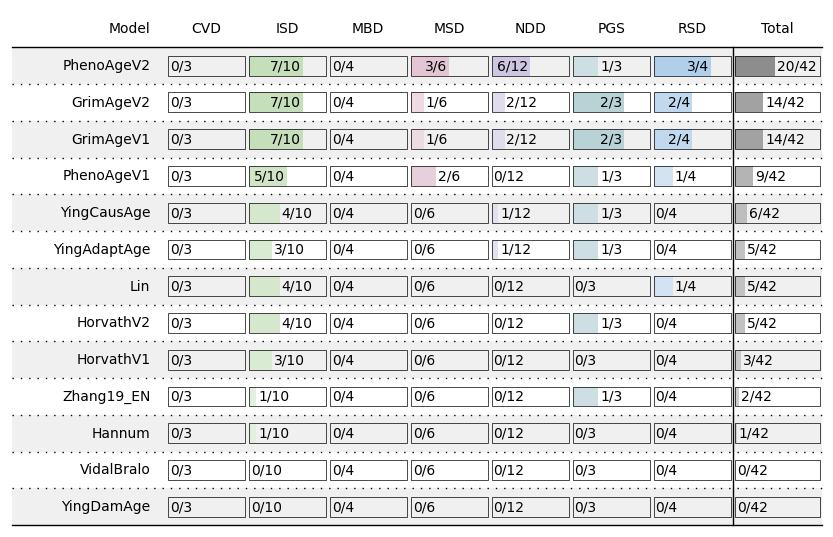

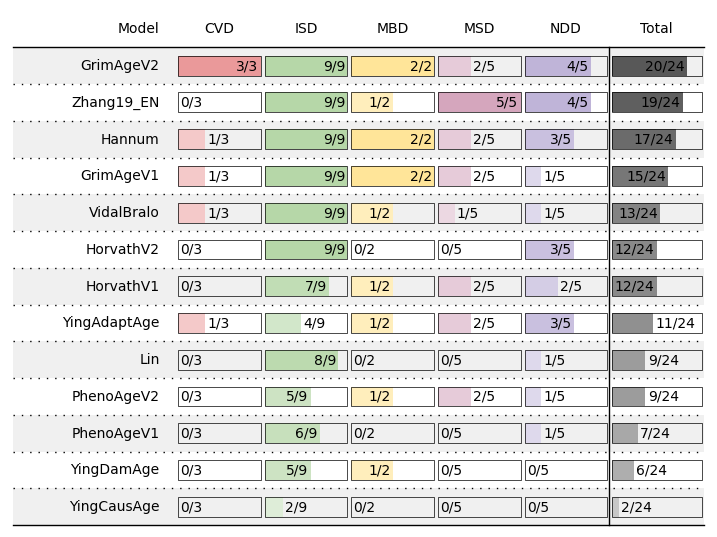

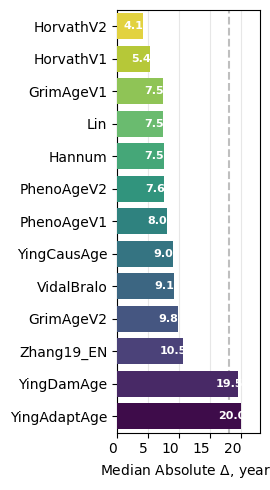

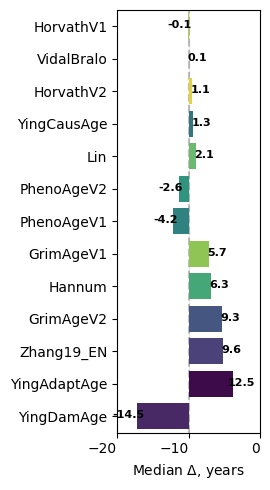

In [4]:
bench = EpiClocksBenchmarking(
    models_config=models_config,
    datasets_config=datasets_config_main,
    tissue_types='BSB',    #{Blood, Saliva, Buccal} cells
    age_limits = [18, 90], #only adult people are in scope
    age_limits_class_exclusions= ['PGS'], #in case of progeria we do not bother about ages
    experiment_prefix='reproduce_paper',  #name the experiment for convenience
    delta_assumption = 'normal',		  #reasonable assumption of normal distribution of age acceleration
    pvalue_threshold=0.05,				  #classical P-value after FDR level of significance
    save_results=True,					  #all results will be saved in results folder in the form of tables
    save_data=False,					  #Do not save methylation data - too heavy, but you can try.
    output_folder='/tank/projects/computage/benchmarking2',
    verbose=1
)
bench.run()

In [5]:
#compute overall BenchScore
aa2_score = bench.corrected_results_AA2_bool.sum(axis=1) 
aa1_score = bench.corrected_results_AA1_bool.sum(axis=1)

mad = bench.CA_prediction_results.set_index('index')['MAE']
relu_md = np.maximum(0, bench.CA_bias_results.set_index('index')['MedE'])

total_score = aa2_score + aa1_score * (1 - relu_md / mad)
total_score = total_score.sort_values(ascending=False)
total_score = round(total_score, 1)
total_score

PhenoAgeV2      29.0
GrimAgeV1       17.4
PhenoAgeV1      16.0
GrimAgeV2       15.1
HorvathV1       15.0
HorvathV2       13.9
VidalBralo      12.8
Lin             11.4
YingAdaptAge     9.1
YingCausAge      7.7
YingDamAge       6.0
Hannum           3.7
Zhang19_EN       3.7
dtype: float64

# Supplementary figures and data

To obtain some of supplementary figures and data, we will work with attributes of `bench` variable that contains instanse of `EpiClockBenchmark` class. Different attributes of this class store necessary information for vizualization and convenient working with *post-benchmark* data.

## Confidence intervals for estimation of medians

In [6]:
# bootstrapping of CA prediction metrics
full_pred = pd.concat(bench.datasets_predictions.values(), axis=0)
full_meta = pd.concat(bench.datasets_metadata.values(), axis=0)
pred = full_pred.loc[full_meta[full_meta['Condition'] == 'HC'].index]
true = full_meta.loc[full_meta[full_meta['Condition'] == 'HC'].index]['Age']
delta = pred.subtract(true, axis=0)

#median abs delta std
nreps = 1000
pct = 0.67
bootres = []
for _ in range(nreps):
	it_res = np.abs(delta.sample(int(len(delta) * pct))).median(axis=0)
	bootres.append(it_res)
bootres = pd.concat(bootres, axis=1)
stdres = bootres.std(axis=1)
stdres

HorvathV1       0.090868
Hannum          0.107061
Lin             0.118932
PhenoAgeV1      0.137213
YingCausAge     0.137877
YingDamAge      0.303821
YingAdaptAge    0.258462
HorvathV2       0.079951
PhenoAgeV2      0.148594
VidalBralo      0.097823
Zhang19_EN      0.187310
GrimAgeV1       0.122072
GrimAgeV2       0.136695
dtype: float64

In [7]:
#median delta std
nreps = 1000
pct = 0.67
bootres = []
for _ in range(nreps):
	it_res = delta.sample(int(len(delta) * pct)).median(axis=0)
	bootres.append(it_res)
bootres = pd.concat(bootres, axis=1)
stdres = bootres.std(axis=1)
stdres

HorvathV1       0.133499
Hannum          0.120138
Lin             0.184253
PhenoAgeV1      0.188656
YingCausAge     0.212671
YingDamAge      0.550349
YingAdaptAge    0.517243
HorvathV2       0.102074
PhenoAgeV2      0.132773
VidalBralo      0.247259
Zhang19_EN      0.178492
GrimAgeV1       0.147395
GrimAgeV2       0.162979
dtype: float64

# Metadata descriptive statistics

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
from computage.utils.data_utils import cond2class

full_meta = pd.concat(bench.datasets_metadata.values(), axis=0)
full_meta['Age'] = full_meta['Age'].astype(float)
full_meta = full_meta[~full_meta['Age'].isna()]
full_meta = full_meta[~full_meta['Condition'].isna()]
full_meta = full_meta[~full_meta['Condition'].isin(['Exclude', 'EA', 'UA', 'OBS', 'MDPS', 'MCI'])]
condition_order = ['HC'] + sorted([c for c in full_meta.Condition.unique() if c not in ['HC']])
full_meta['Gender'] = full_meta['Gender'].map({'M':'Male', 'F':'Female'})
full_meta['Gender'] = full_meta['Gender'].fillna('Unknown')
full_meta['Class'] = ['HC' if c == 'HC' else cond2class([c])[0] for c in full_meta['Condition']]
class_order = ['HC'] + sorted([c for c in full_meta.Class.unique() if c not in ['HC']])
full_meta = full_meta.sort_values('Condition')

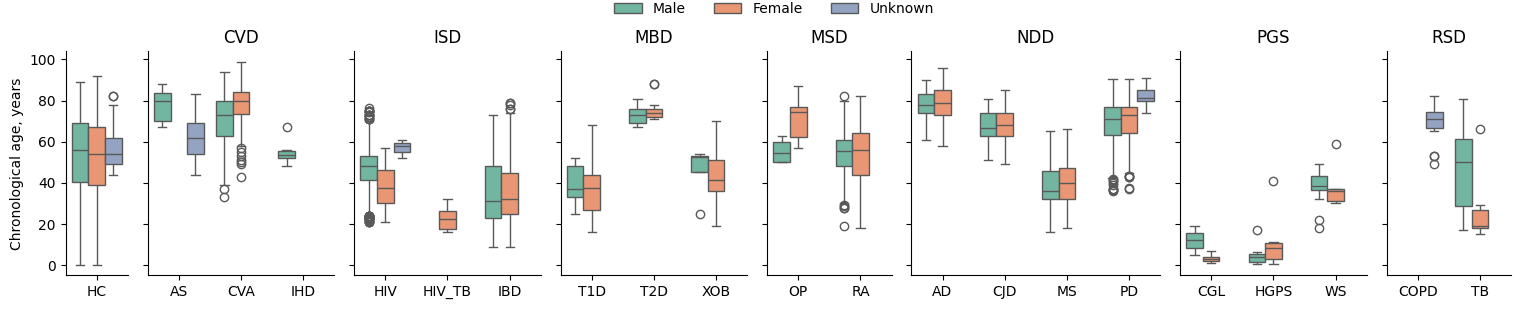

In [11]:
g = sns.FacetGrid(full_meta, col="Class", sharex=False,
                  col_order=class_order,
                  gridspec_kws={"width_ratios":[1, 3, 3, 3, 2, 4, 3, 2]},
                  height=3.0,
				  aspect=0.5
                  )
g.map(sns.boxplot, "Condition", "Age",  "Gender", 
      **{"hue_order":['Male', 'Female', 'Unknown'],
         "palette":sns.color_palette('Set2')
         })
		 
g.add_legend(**{'ncol':3, 'loc':[0.40, 0.93]})
g.axes[0][0].set_ylabel('Chronological age, years')

for i in range(len(g.axes[0])):
	g.axes[0][i].set_xlabel('')
	cl = g.axes[0][i].get_title().split('= ')[1]
	if cl != 'HC':
		g.axes[0][i].set_title(f'{cl}')
	else:
		g.axes[0][i].set_title(f'')

plt.tight_layout()
# plt.savefig(f'figures/main/age_statistics.pdf', format='pdf', dpi=200) #choose your path for saving!
plt.show()

# AA2 supplementary detailed plots

Here we build *a lot* of detailed panels representing how a particular model worked on a particular dataset along with Welch's test P-value (without FDR correction). It may take some time.

In [22]:
from computage.utils.data_utils import cond2class
import seaborn as sns
from matplotlib import pyplot as plt

df = bench.bench_deltas_AA2
df["Class"] = cond2class([c.split(':')[1] for c in df['Dataset']])
df['Model'] = df['Model'].str.replace('_', ' ')

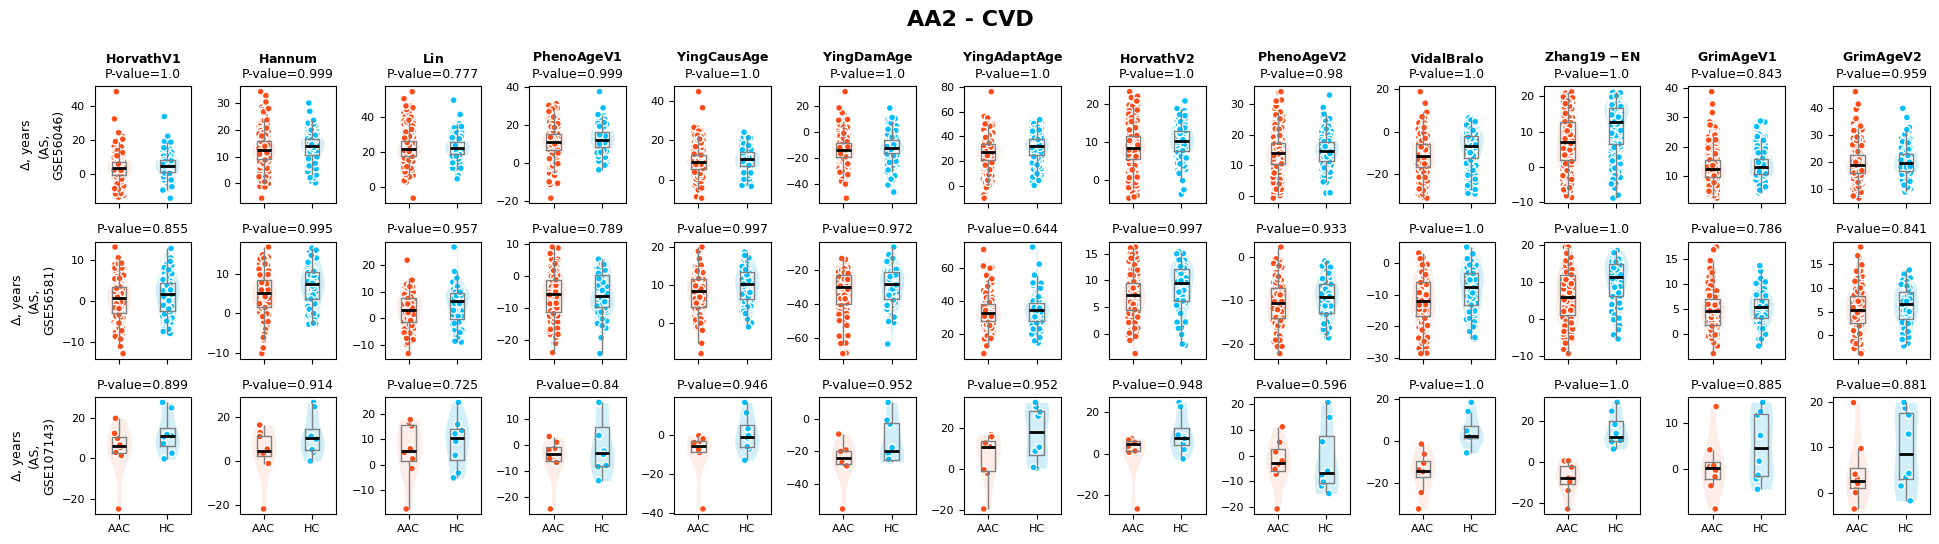

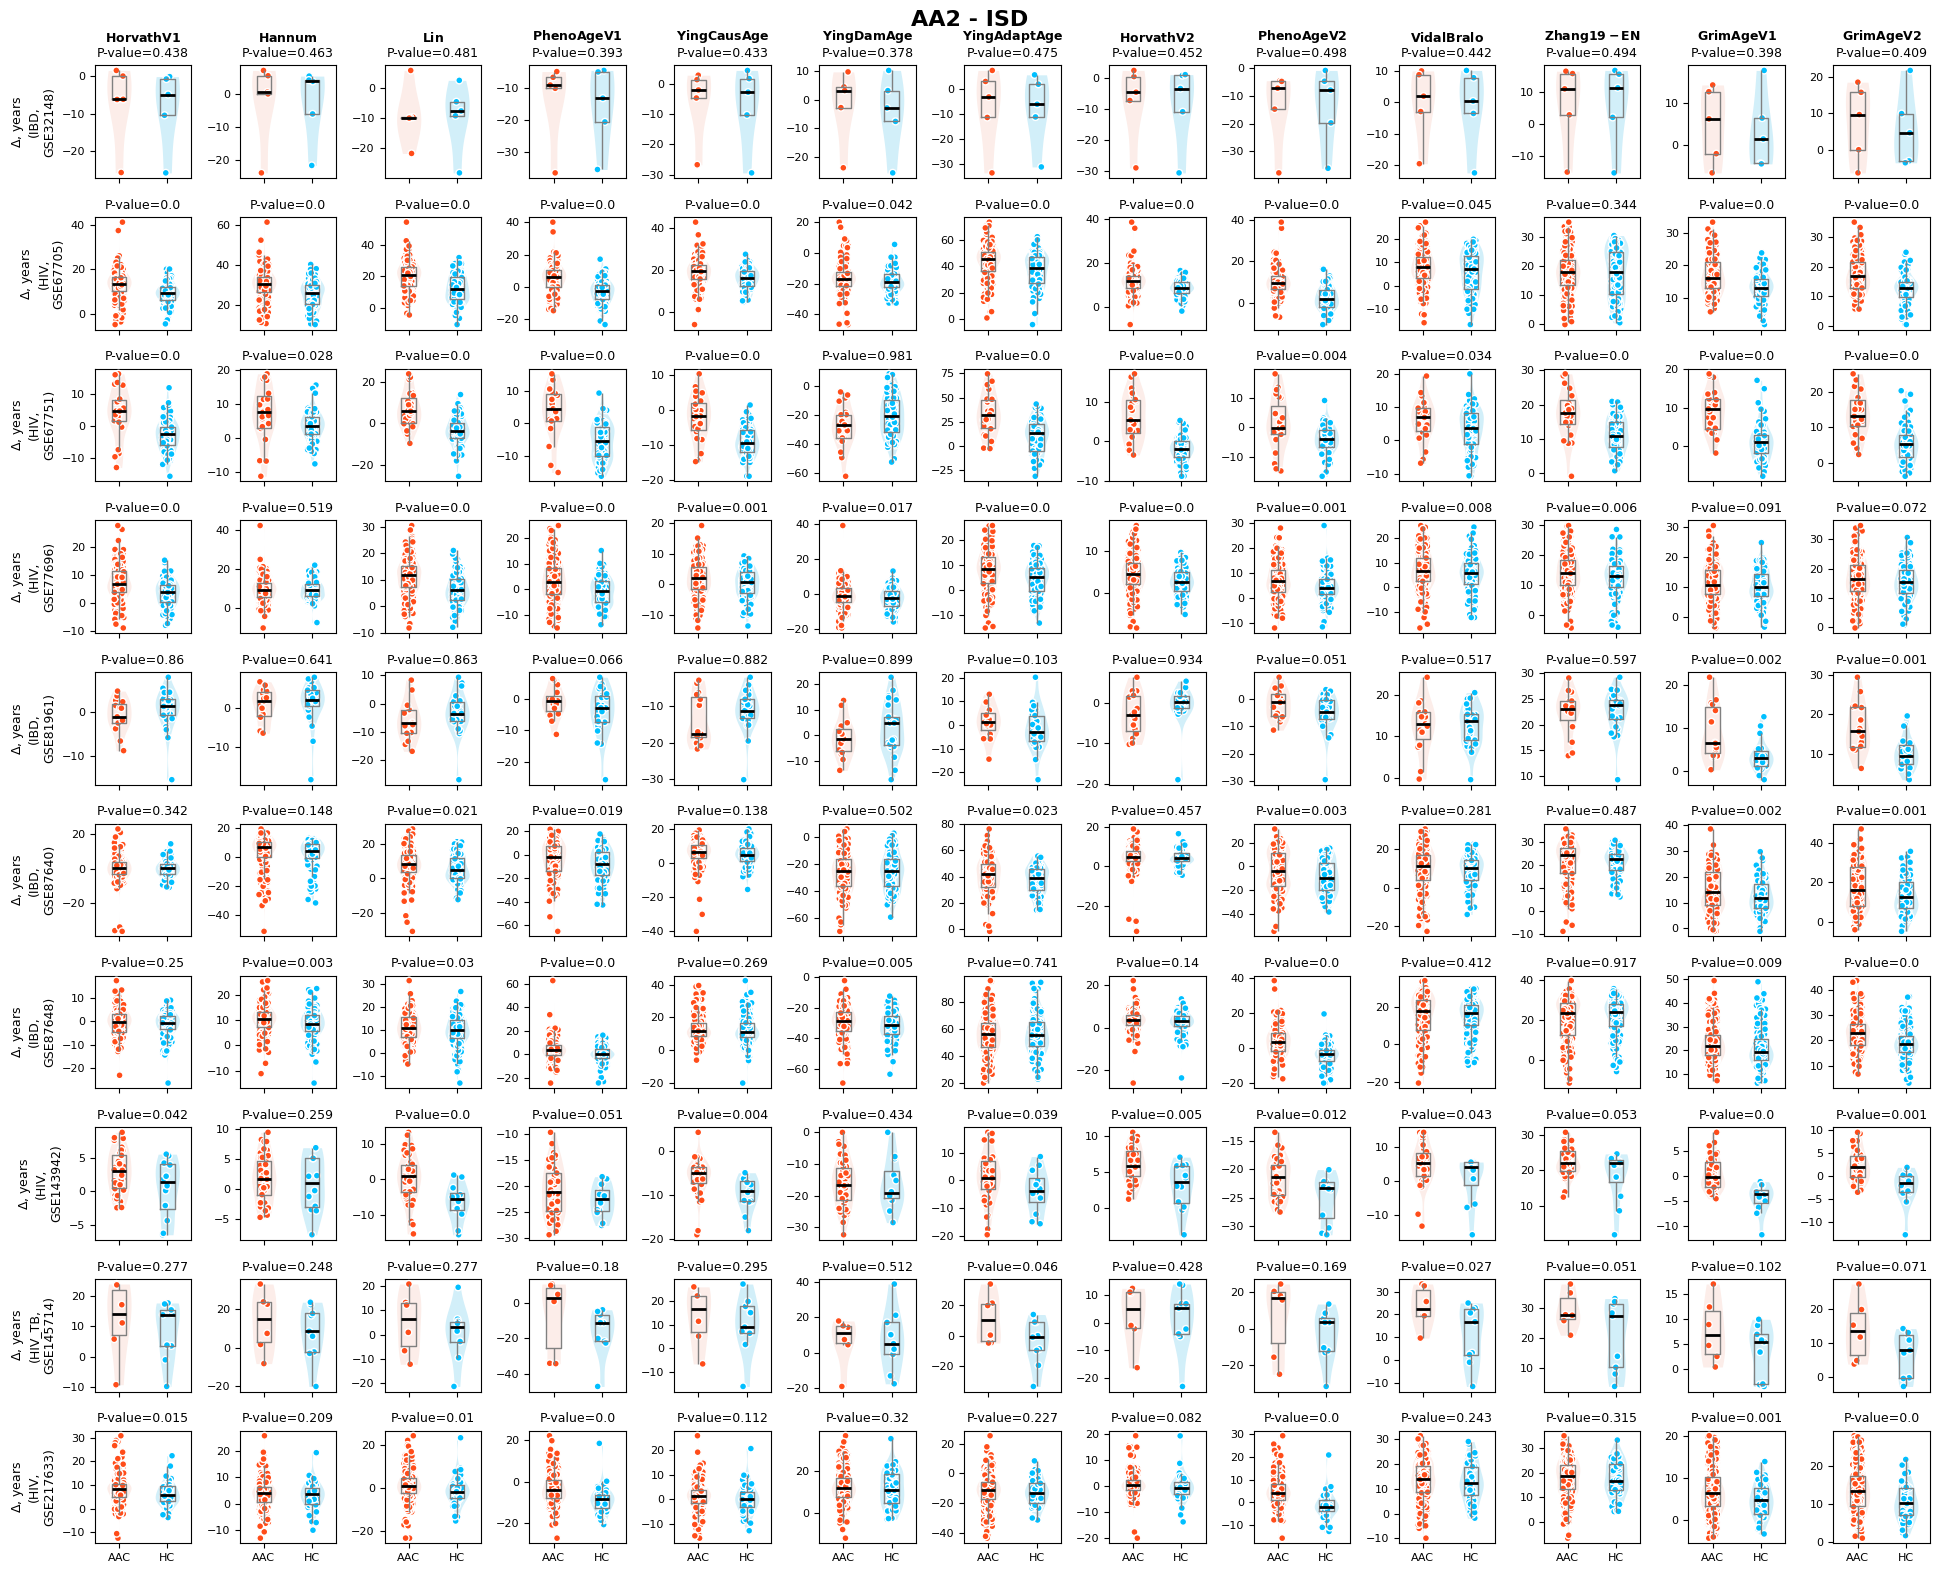

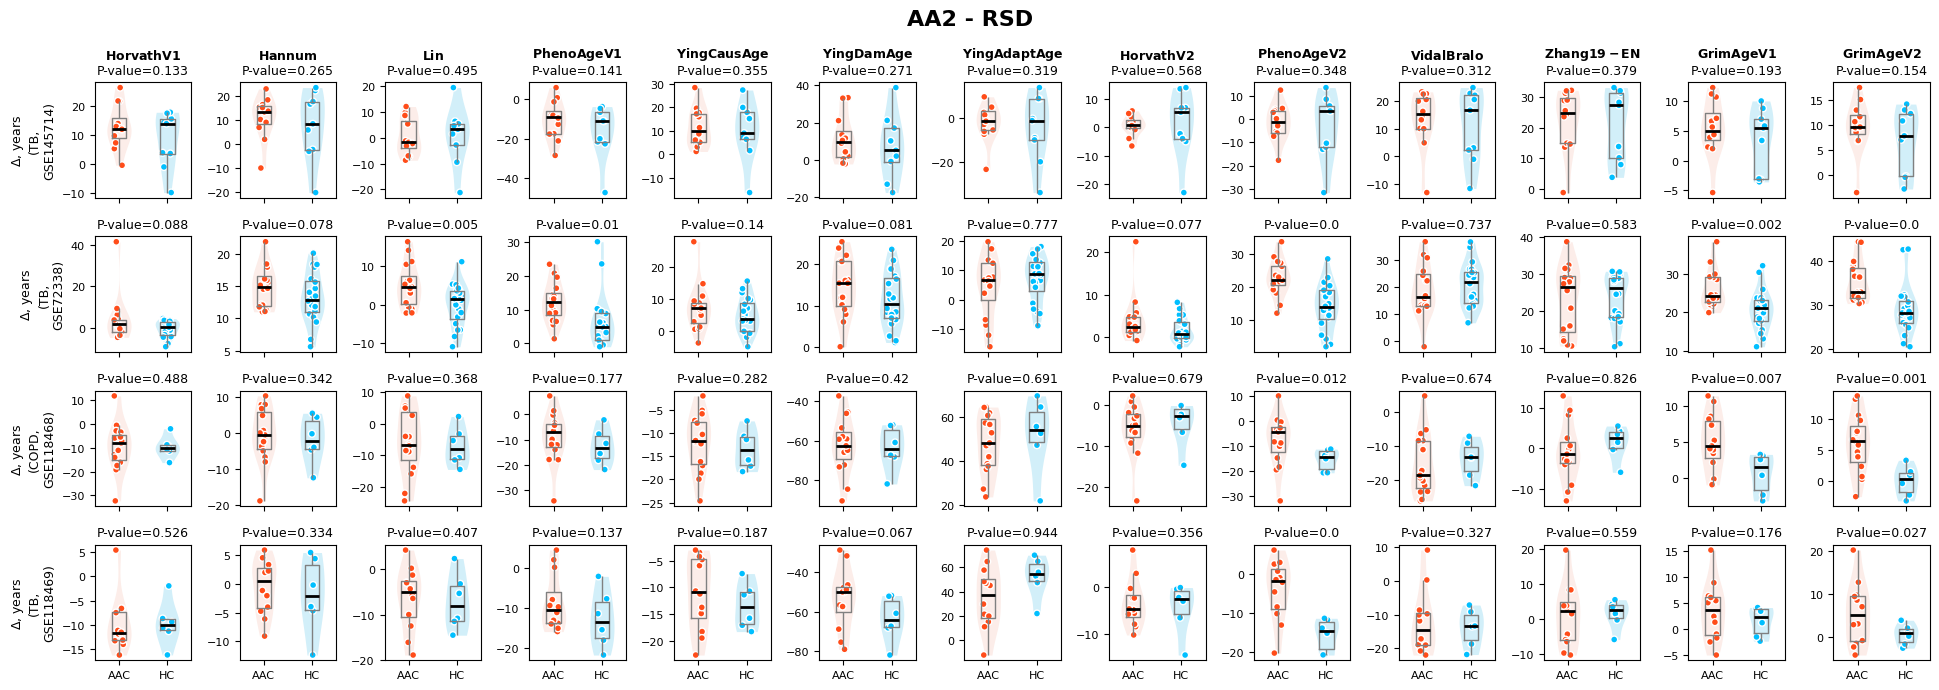

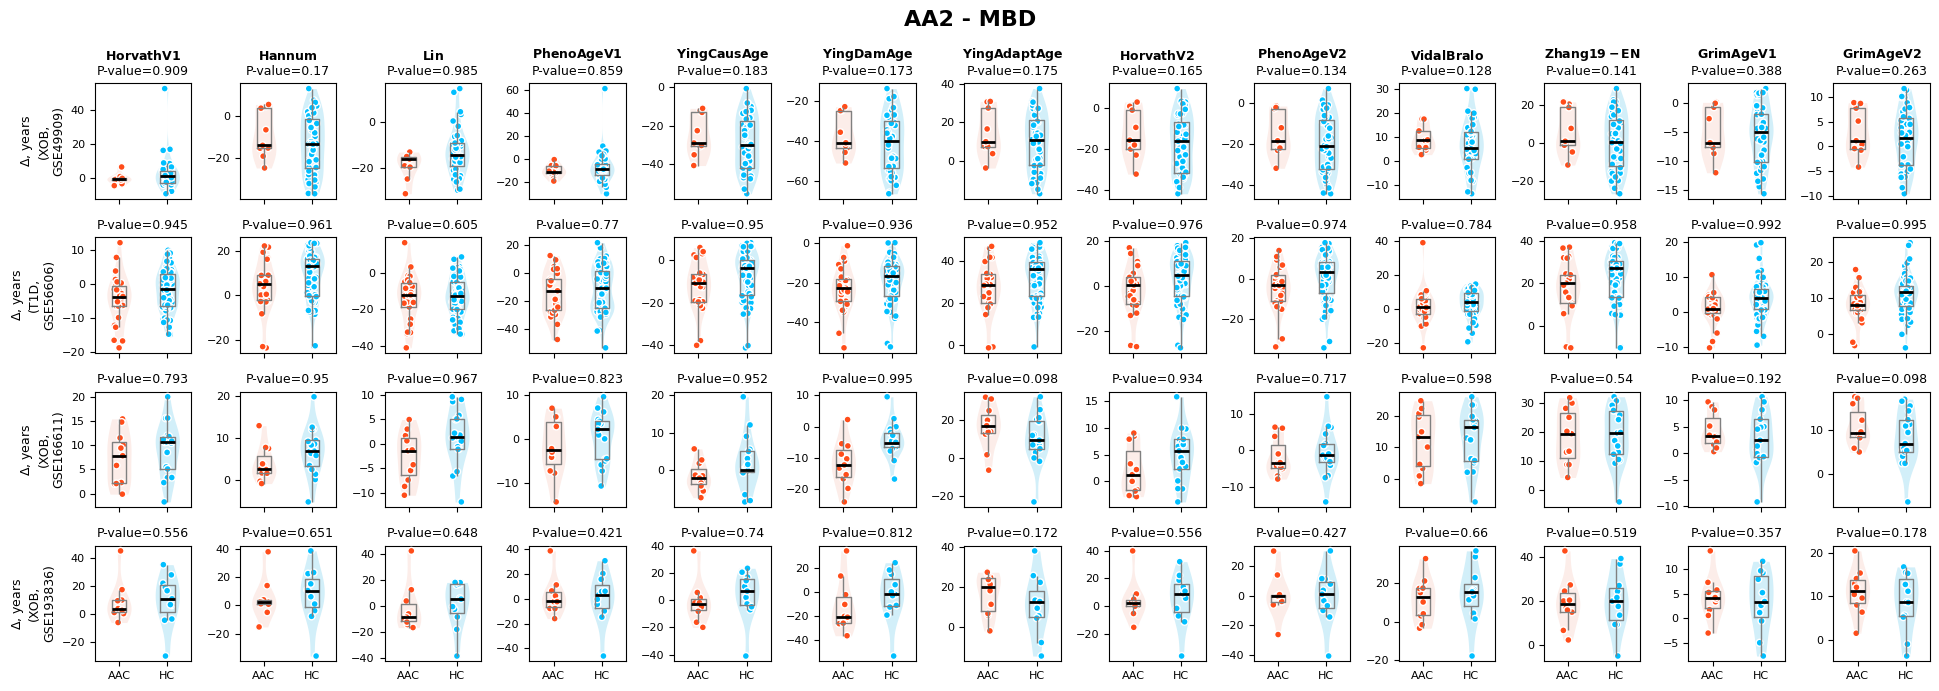

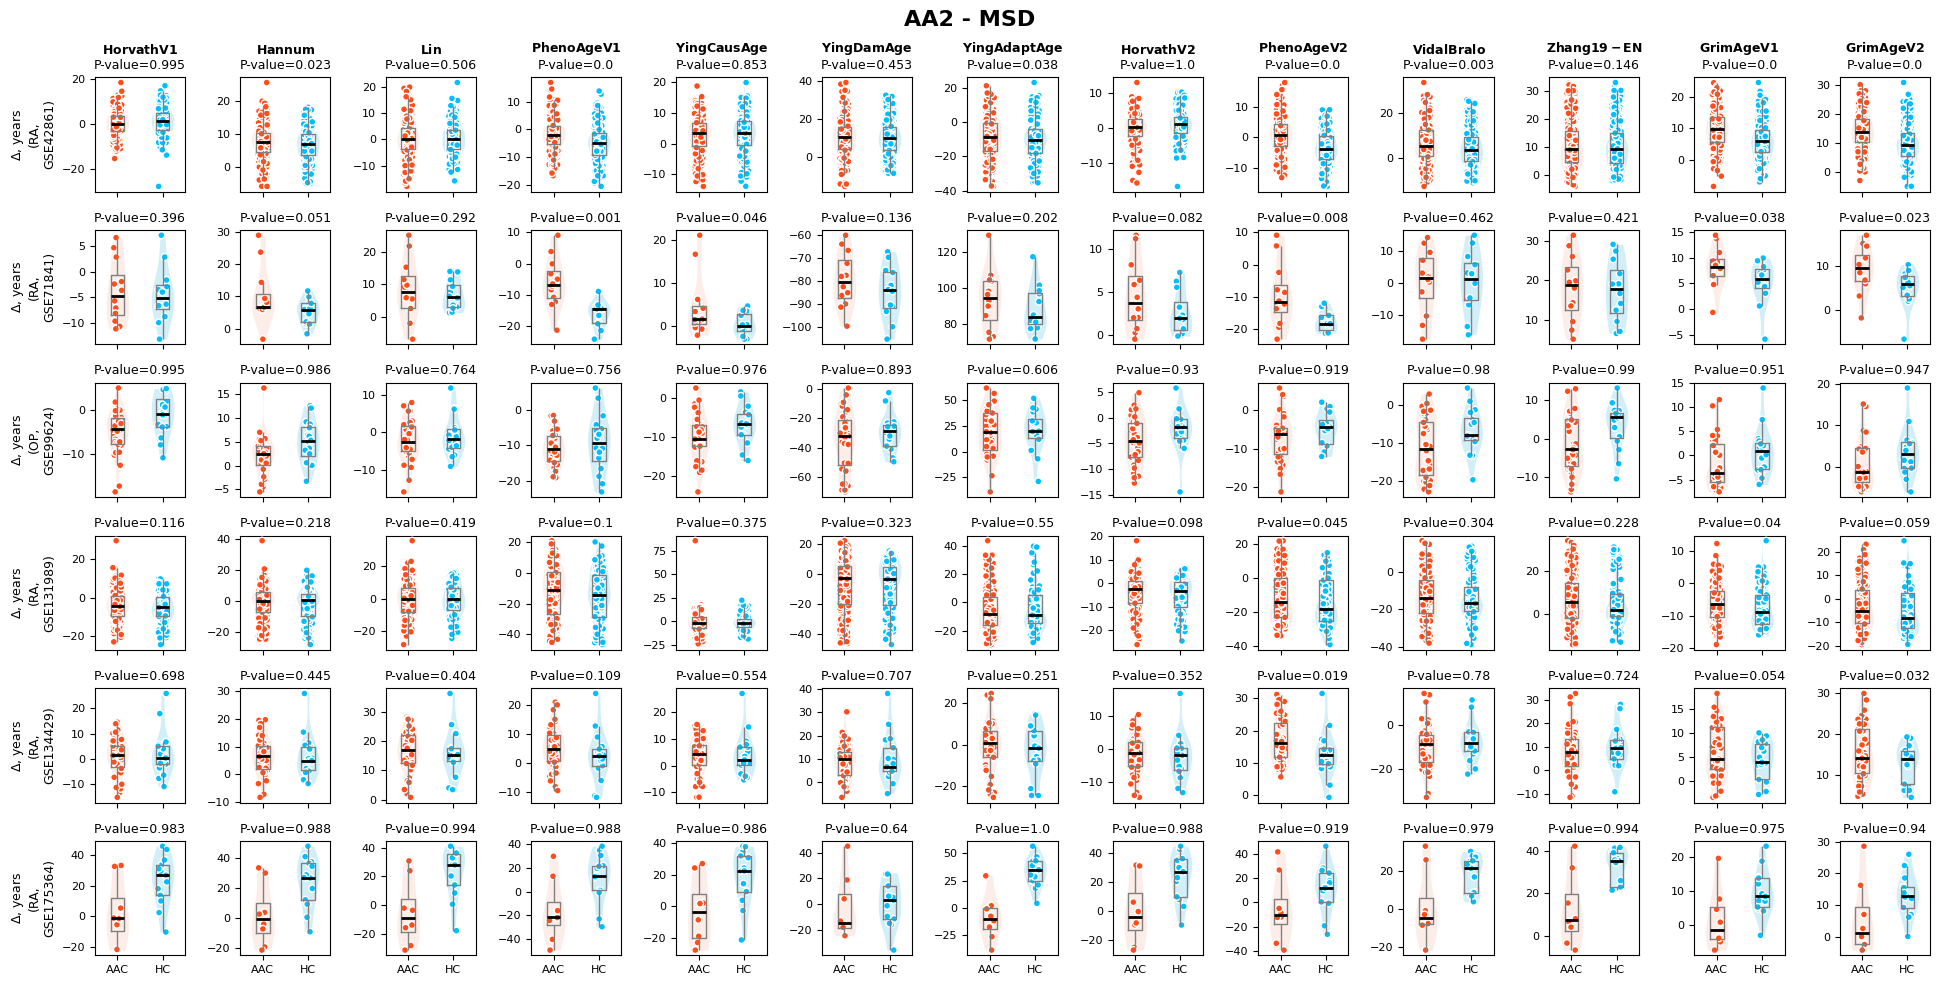

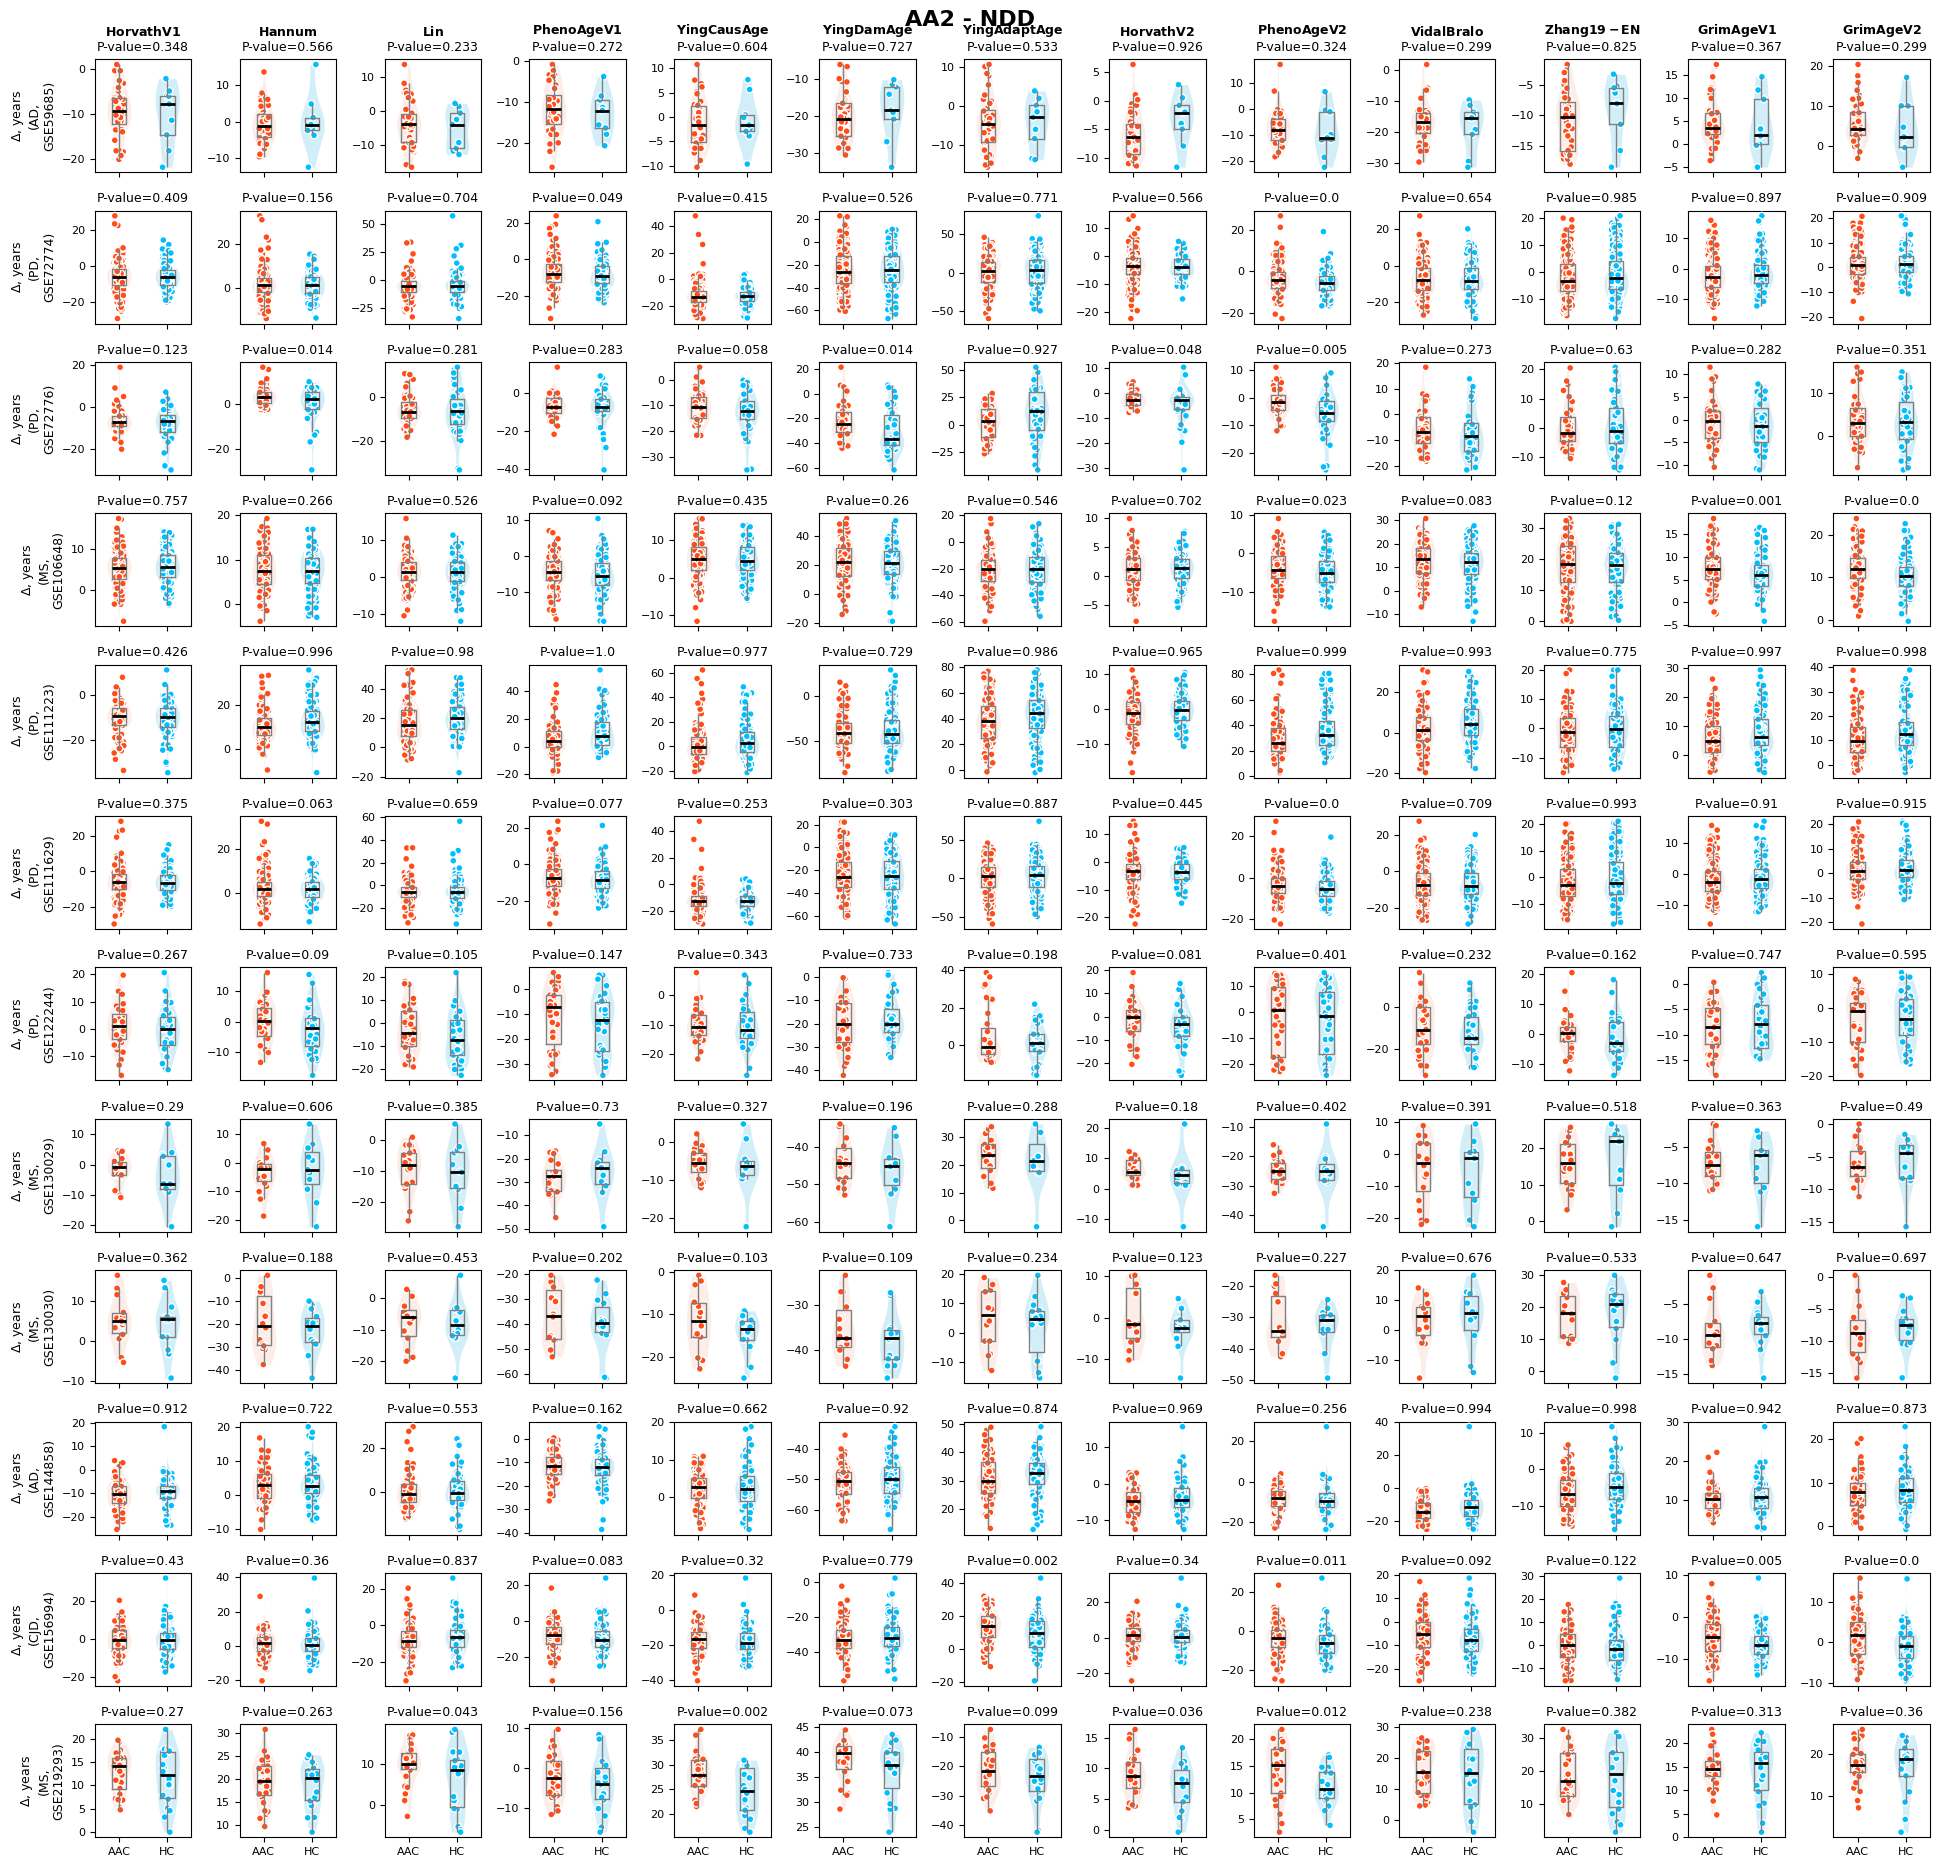

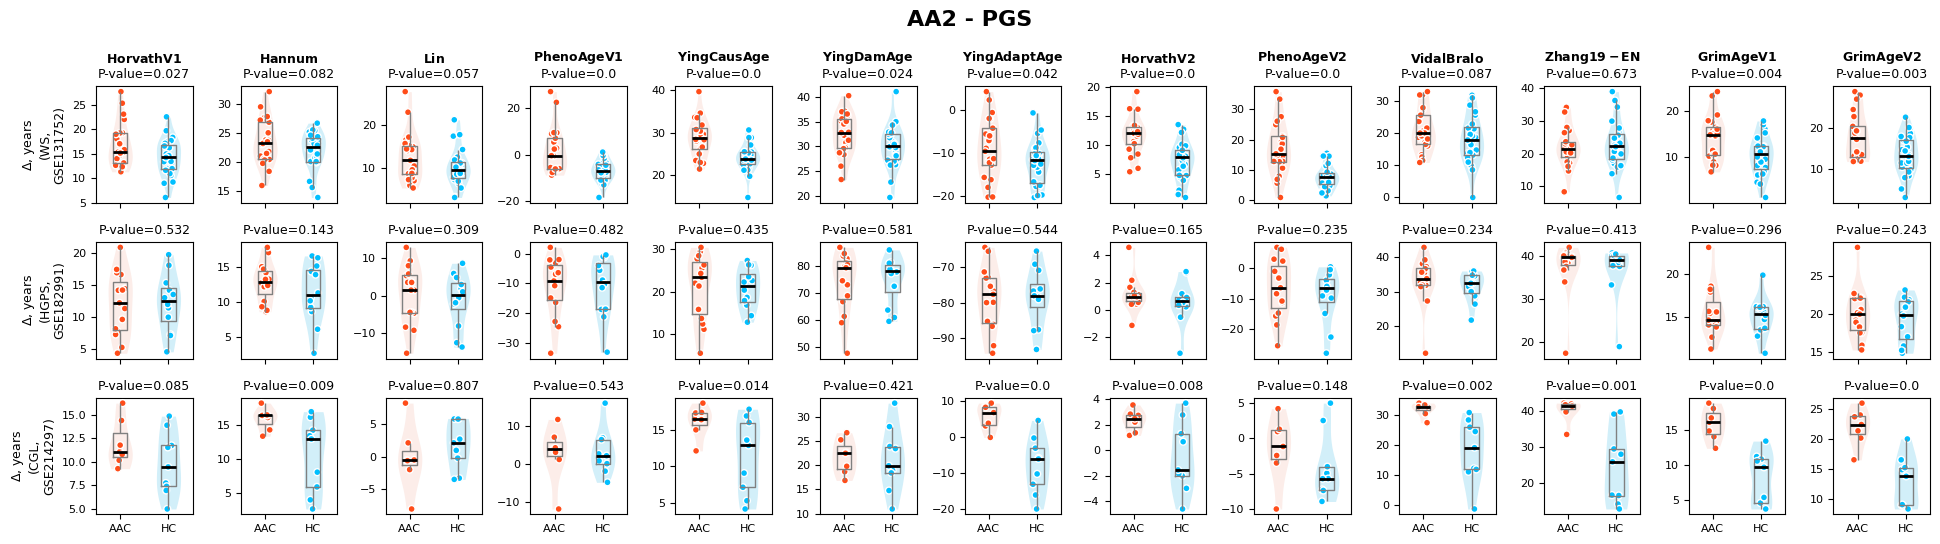

In [27]:
models = df.Model.unique()
n_cols = len(df.Model.unique())
for cl in df['Class'].unique():
    dfcl = df[df['Class']==cl]
    class_datasets = dfcl.Dataset.unique()
    n_rows = len(class_datasets)
    
    fig, axes = plt.subplots(n_rows, n_cols, 
                             figsize=(n_cols*1.5, n_rows*1.5 + 1),
                             sharey=False, sharex=True, squeeze=False)
    fig.suptitle(f'AA2 - {cl}', fontsize=16, fontweight='bold')
    for i, d in enumerate(class_datasets):
        for j, m in enumerate(models):
            plotdata = dfcl[(dfcl.Model == m) & (dfcl.Dataset == d)]
            pval = bench.bench_results.loc[m, d]
            palette_swarm = ["#FF4C19", "#00BFFF"]
            palette_box = [ "#FFEBE6", "#CCF2FF"]

            x = 'Condition'
            y = 'Delta'
            
            sns.violinplot(data=plotdata, x=x, y=y, ax=axes[i, j],
                            palette=palette_box, width=0.5, inner=None, cut=0, linewidth=0, native_scale=True)
            sns.stripplot(data=plotdata, x=x, y=y, ax=axes[i, j],
                            palette=palette_swarm, linewidth=1, edgecolor='w', size=5, native_scale=True)
            sns.boxplot(data=plotdata, x=x, y=y, ax=axes[i, j],
                        fill=False, width=0.3, medianprops={'color': 'k', 'linewidth': 2}, zorder=3,
                        linewidth=1, color='gray', showfliers=False, showcaps=False, native_scale=True)

            axes[i, j].set_xlabel('')
            axes[i, j].tick_params(axis='x', labelsize=8)
            axes[i, j].tick_params(axis='y', labelsize=8)
            if i == 0:
                if m == 'Zhang19_EN':
                    m = 'Zhang19-EN'
                axes[0, j].set_title(r'$\bf{{{m}}}$'.format(m=m) + f'\nP-value={round(pval, 3)}', fontsize=9)
            else:
                axes[i, j].set_title(f'P-value={round(pval,3)}', fontsize=9)

            if j != 0:
                axes[i, j].set_ylabel('')
            else:
                axes[i, j].set_ylabel(f'$\Delta$, years\n({d.split(":")[1]},\n{d.split(":")[0]})', fontsize=9)
    
    plt.tight_layout()            
    # plt.savefig(f'figures/supplement/AA2-{cl}_boxes_sup.pdf', format='pdf', dpi=250)
    plt.show()
        

# AA1 supplementary detailed plots

In [28]:
from computage.utils.data_utils import cond2class
import seaborn as sns
from matplotlib import pyplot as plt

df = bench.bench_deltas_AA1
df["Class"] = cond2class([c.split(':')[1] for c in df['Dataset']])

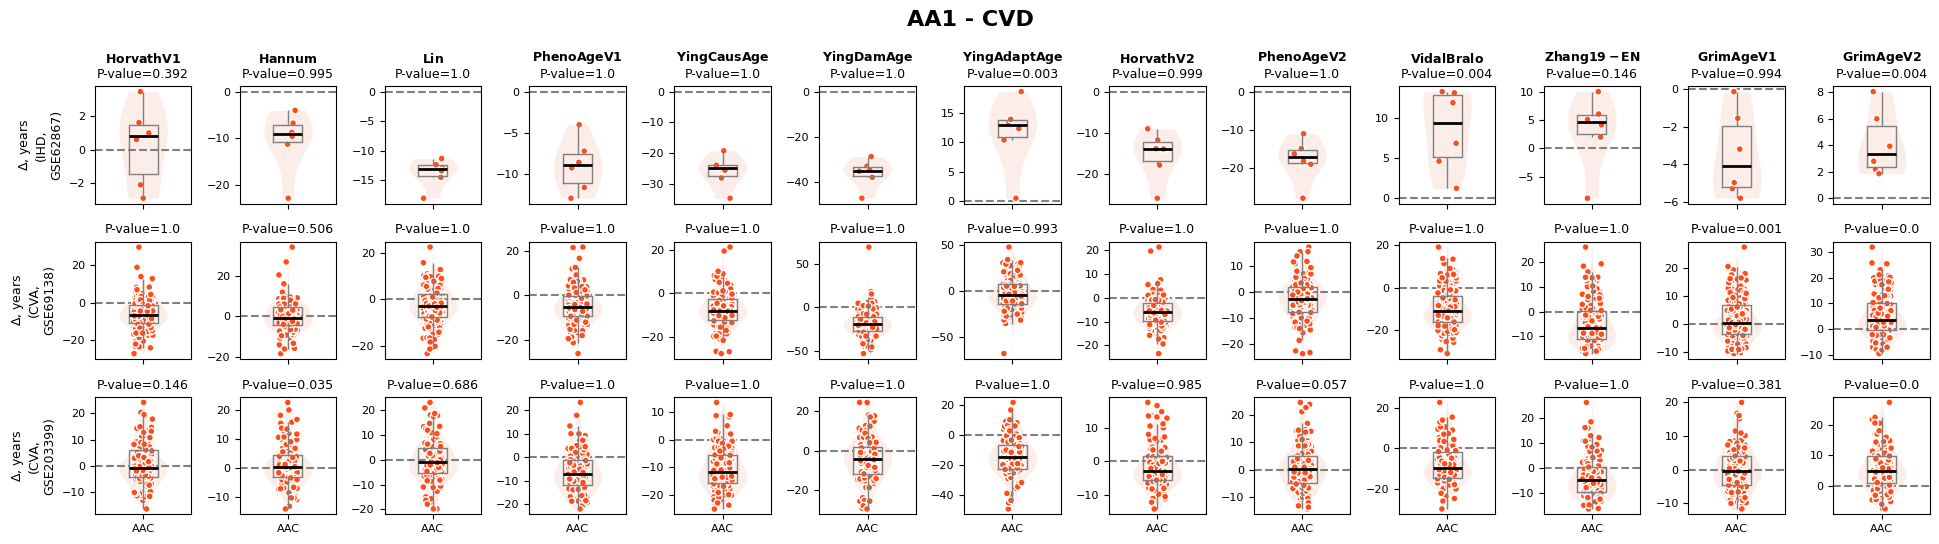

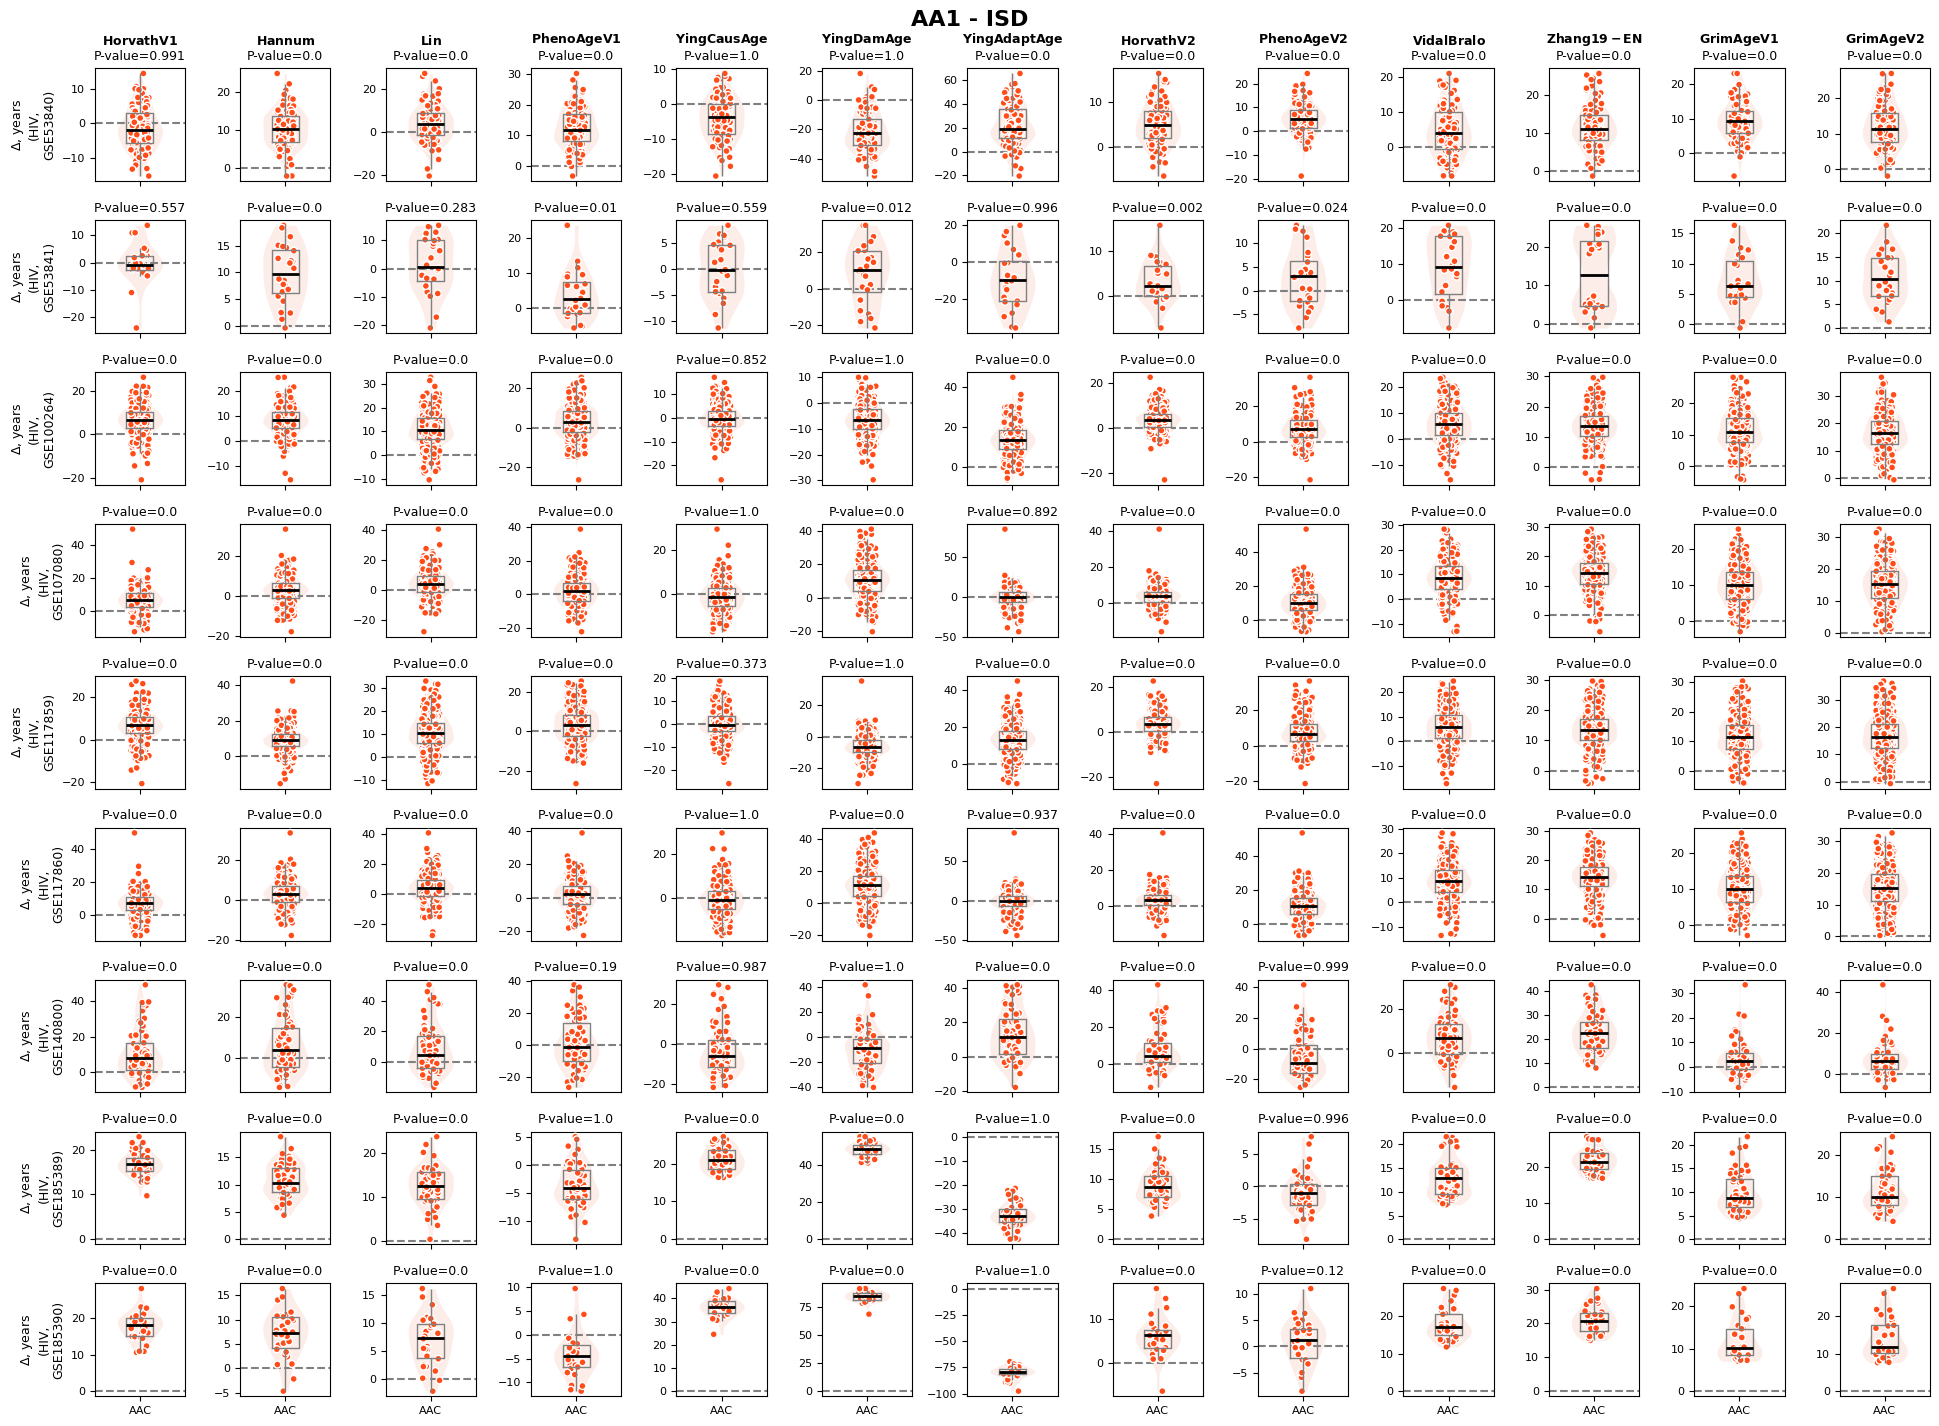

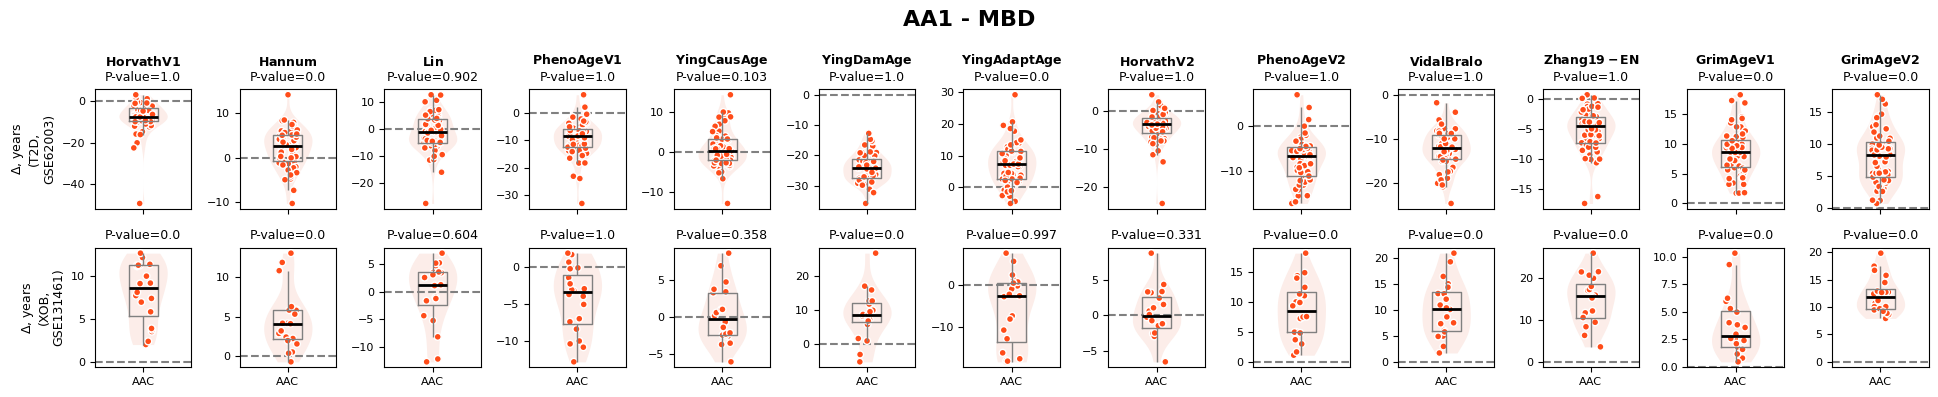

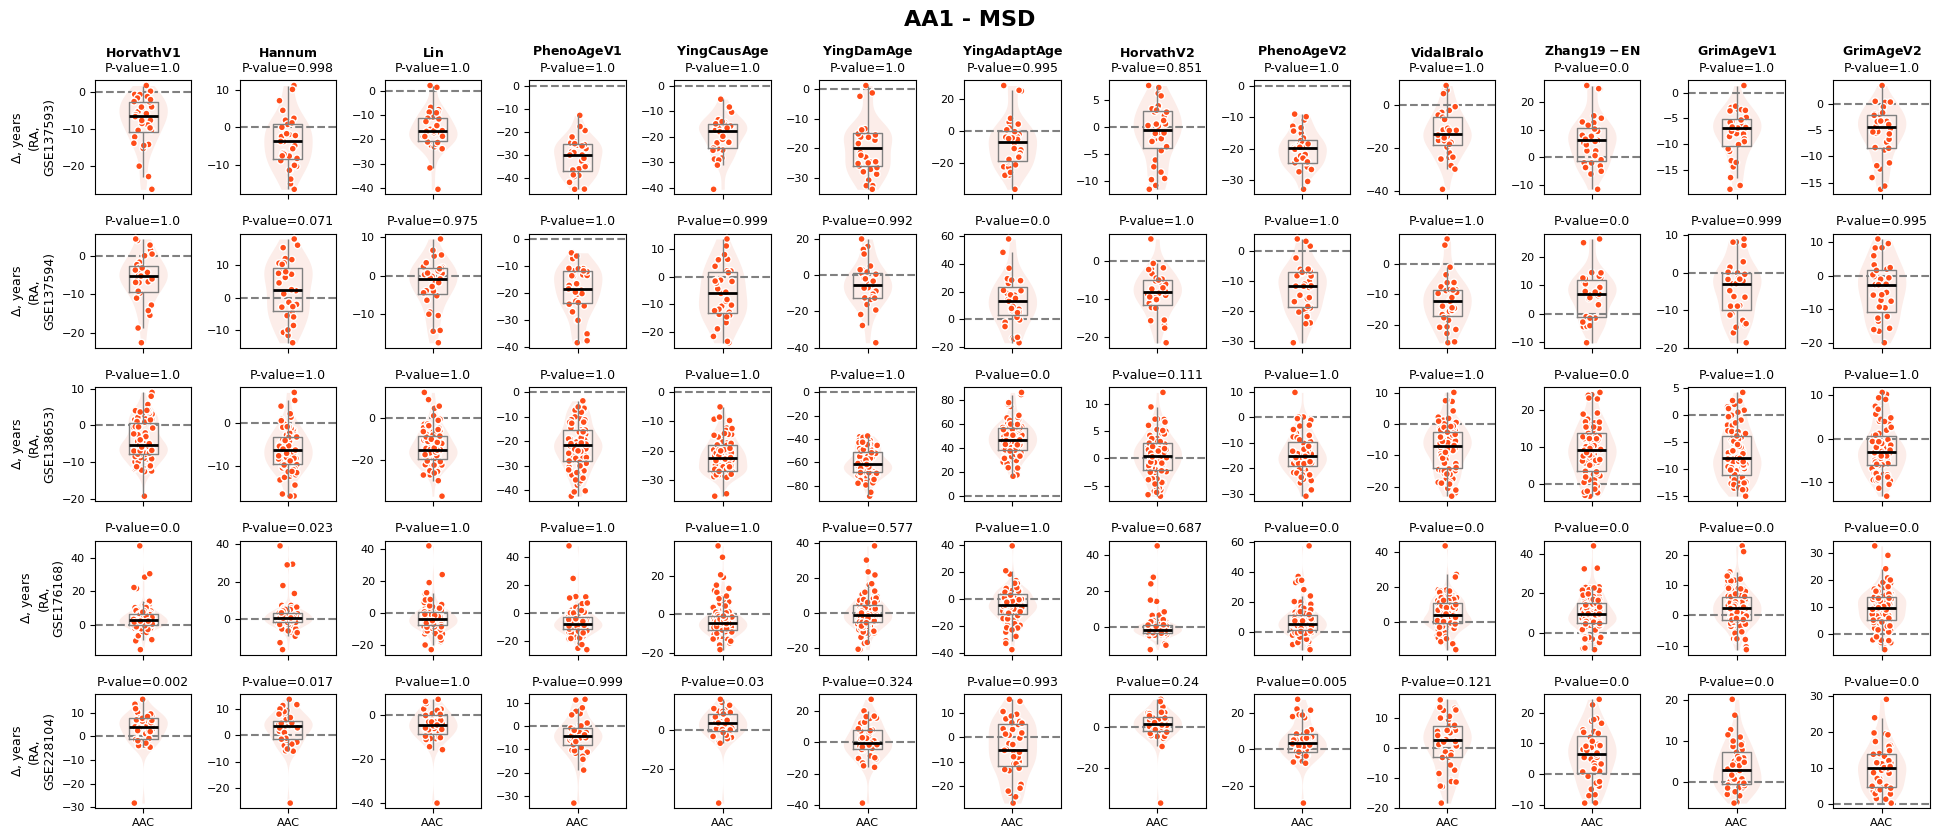

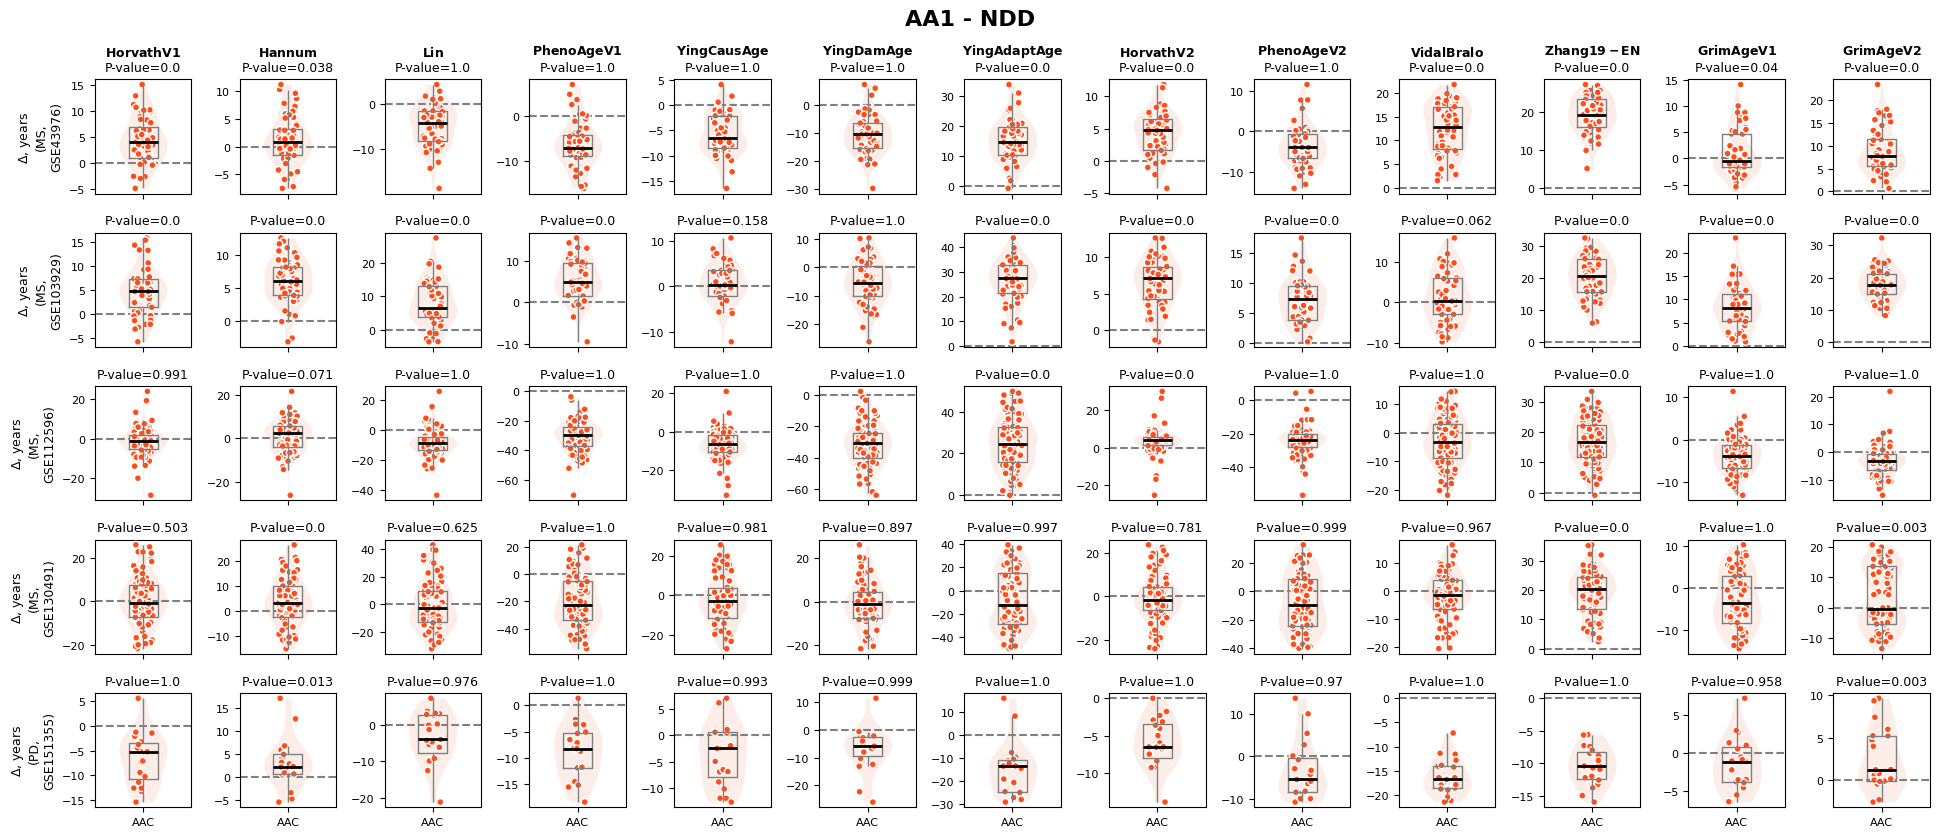

In [31]:
models = df.Model.unique()
n_cols = len(df.Model.unique())
for cl in df['Class'].unique():
    dfcl = df[df['Class']==cl]
    class_datasets = dfcl.Dataset.unique()
    n_rows = len(class_datasets)
    
    fig, axes = plt.subplots(n_rows, n_cols, 
                             figsize=(n_cols*1.5, n_rows*1.5 + 1),
                             sharey=False, sharex=True, squeeze=False)
    fig.suptitle(f'AA1 - {cl}', fontsize=16, fontweight='bold')
    for i, d in enumerate(class_datasets):
        for j, m in enumerate(models):
            plotdata = dfcl[(dfcl.Model == m) & (dfcl.Dataset == d)]
            pval = bench.bench_results.loc[m, d]
            palette_swarm = ["#FF4C19", "#00BFFF"]
            palette_box = [ "#FFEBE6", "#CCF2FF"]

            x = 'Condition'
            y = 'Delta'
            
            sns.violinplot(data=plotdata, x=x, y=y, ax=axes[i, j],
                            palette=palette_box, width=0.5, inner=None, cut=0, linewidth=0, native_scale=True)
            sns.stripplot(data=plotdata, x=x, y=y, ax=axes[i, j],
                            palette=palette_swarm, linewidth=1, edgecolor='w', size=5, native_scale=True)
            sns.boxplot(data=plotdata, x=x, y=y, ax=axes[i, j],
                        fill=False, width=0.3, medianprops={'color': 'k', 'linewidth': 2}, zorder=3,
                        linewidth=1, color='gray', showfliers=False, showcaps=False, native_scale=True)

            axes[i, j].set_xlabel('')
            axes[i, j].tick_params(axis='x', labelsize=8)
            axes[i, j].tick_params(axis='y', labelsize=8)
            axes[i, j].axhline(0., color='grey', ls='--')
            if i == 0:
                if m == 'Zhang19_EN':
                    m = 'Zhang19-EN'
                axes[0, j].set_title(r'$\bf{{{m}}}$'.format(m=m) + f'\nP-value={round(pval, 3)}', fontsize=9)
            else:
                axes[i, j].set_title(f'P-value={round(pval,3)}', fontsize=9)

            if j != 0:
                axes[i, j].set_ylabel('')
            else:
                axes[i, j].set_ylabel(f'$\Delta$, years\n({d.split(":")[1]},\n{d.split(":")[0]})', fontsize=9)
    
    plt.tight_layout()            
    # plt.savefig(f'figures/supplement/AA1-{cl}_boxes_sup.pdf', format='pdf', dpi=250)
    plt.show()